In [1]:
import re
import nltk
import spacy
import os
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wordcloud
from collections import Counter

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,8)

In [2]:
listAtas = os.listdir("../atas")

In [3]:
corpus = []

for ata in listAtas:
    with open("../atas/" + ata,'rt', encoding='utf-8') as f:
        lines = f.readlines()
        if lines: 
            lines = ' '.join(lines)
            corpus.append(lines)

print(len(corpus),"atas")

228 atas


# Corpus Characteristics 

In [4]:
%%time
corpusJoined = ' '.join(corpus)
corpusJoinedWithoutPunctuation =  re.sub(r'[^\w\s]','',corpusJoined)
corupsWordTokenized = nltk.word_tokenize(corpusJoined)
corupsWordTokenizedWithoutPunctuation = nltk.word_tokenize(corpusJoinedWithoutPunctuation)
corpusJoinedWithoutSpaces = re.sub(' ','', corpusJoined)
corpusSentences = nltk.tokenize.sent_tokenize(corpusJoined)

CPU times: user 11.1 s, sys: 110 ms, total: 11.3 s
Wall time: 11.3 s


In [5]:
print("Number of characters with spaces: ", len(corpusJoined))
print("Number of characters without spaces: ", len(corpusJoinedWithoutSpaces))
print("Number of words: ",len(corupsWordTokenizedWithoutPunctuation))
print("Number of sentences: ", len(corpusSentences))
print("Number of characters per words: ", len(corpusJoinedWithoutSpaces)/len(corupsWordTokenizedWithoutPunctuation))
print("Number of words per sentence: ", len(corupsWordTokenizedWithoutPunctuation)/len(corpusSentences))

Number of characters with spaces:  7611152
Number of characters without spaces:  6404414
Number of words:  1189799
Number of sentences:  49384
Number of characters per words:  5.382769694713141
Number of words per sentence:  24.092803337113235


# Frequencies 

In [6]:
corpusJoined = corpusJoined.lower()
for i in range(0,len(corpus)):
    corpus[i]=corpus[i].lower()
    corpus[i] = re.sub('\n','',corpus[i]) #remove newline character

In [7]:
Mystopwords = ['ainda','ante','p','r','sobre'] + ['janeiro','fevereiro','março','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro','mês','meses','ano','anos'] + [str(i) for i in range(10)] + nltk.corpus.stopwords.words('portuguese')


## Character frequency 

In [8]:
charCountVect = CountVectorizer(analyzer='char')
charCountVect.fit(corpus);

In [9]:
bagOfChar = charCountVect.transform(corpus)
sumChars = bagOfChar.sum(axis=0)
charsFreq = [(char, sumChars[0, idx]) for char, idx in charCountVect.vocabulary_.items()]
charsFreq =sorted(charsFreq, key = lambda x: x[1], reverse=True)

In [10]:
numberOfChars = 20
yPos = np.arange(numberOfChars)
objects = []
performance = []
for i in range(numberOfChars):
    aux = charsFreq[i]
    objects.append(aux[0])
    performance.append(aux[1])

In [11]:
pd.Series(performance, index = objects, name = "Frequency").to_frame()

,Frequency
,1190946
e,754769
a,675767
o,625335
s,451053
r,391510
i,383637
d,361865
n,328632
t,287389


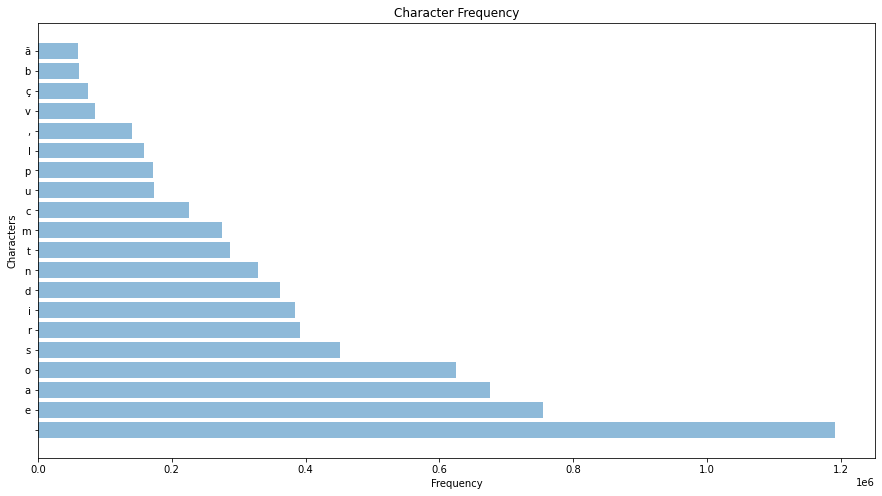

In [12]:
#horizontal bars
plt.barh(yPos, performance, align='center', alpha=0.5)
plt.yticks(yPos, objects)
plt.xlabel('Frequency')
plt.ylabel('Characters')
plt.title('Character Frequency')
plt.show()


## Word Frequency

In [13]:
# number of words in the barplots
numberOfWords = 20

### With stop words

In [14]:
wordCountVect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
wordCountVect.fit(corpus);

In [15]:
bagOfWords = wordCountVect.transform(corpus)
sumWords = bagOfWords.sum(axis=0)
wordsFreq = [(word, sumWords[0, idx]) for word, idx in wordCountVect.vocabulary_.items()]
wordsFreq =sorted(wordsFreq, key = lambda x: x[1], reverse=True)

In [16]:
yPos = np.arange(numberOfWords)
objects = []
performance = []
for i in range(numberOfWords):
    aux = wordsFreq[i]
    objects.append(aux[0])
    performance.append(aux[1])


In [17]:
pd.Series(performance, index = objects, name = "Frequency").to_frame()

,Frequency
de,93951
a,41195
em,39293
e,32084
o,27821
do,24770
da,21635
no,18766
para,17303
que,14345


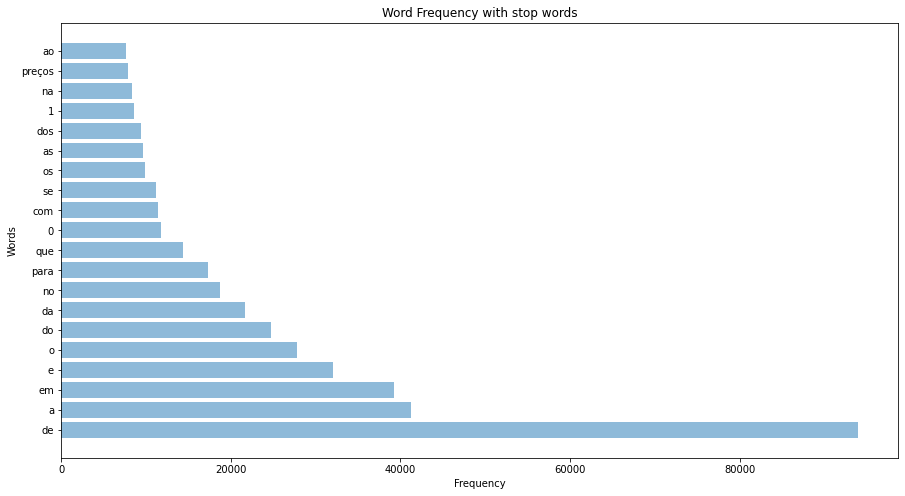

In [18]:
plt.barh(yPos, performance, align='center', alpha=0.5)
plt.yticks(yPos, objects)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Word Frequency with stop words')
plt.show()


### Wordcloud with stop words

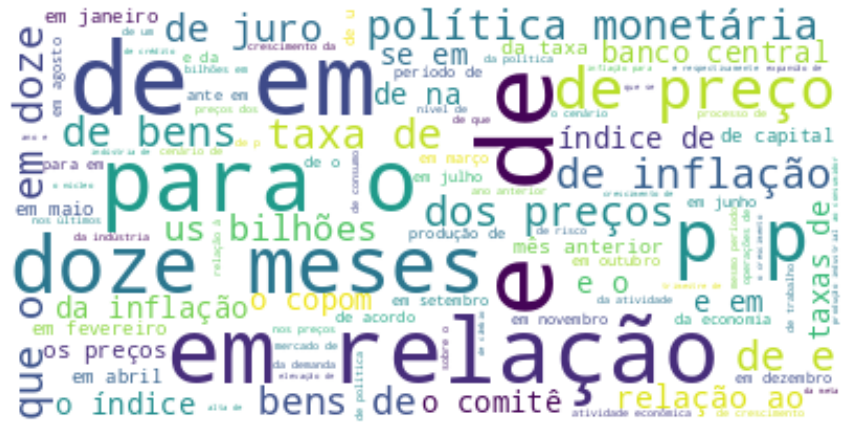

In [19]:
cloud = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white").generate(corpusJoined)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Without stop words

In [20]:
wordCountVect2 = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', stop_words = Mystopwords)
wordCountVect2.fit(corpus);

In [21]:
bagOfWords2 = wordCountVect2.transform(corpus)
sumWords2 = bagOfWords2.sum(axis=0)
wordsFreq2 = [(word, sumWords2[0, idx]) for word, idx in wordCountVect2.vocabulary_.items()]
wordsFreq2 =sorted(wordsFreq2, key = lambda x: x[1], reverse=True)

In [22]:
yPos = np.arange(numberOfWords)
objects = []
performance = []
for i in range(numberOfWords):
    aux = wordsFreq2[i]
    objects.append(aux[0])
    performance.append(aux[1])

In [23]:
pd.Series(performance, index = objects, name = "Frequency").to_frame()

,Frequency
preços,7942
inflação,7643
taxa,4563
relação,4330
copom,4000
bilhões,3946
crescimento,3696
produção,3349
doze,3337
bens,3326


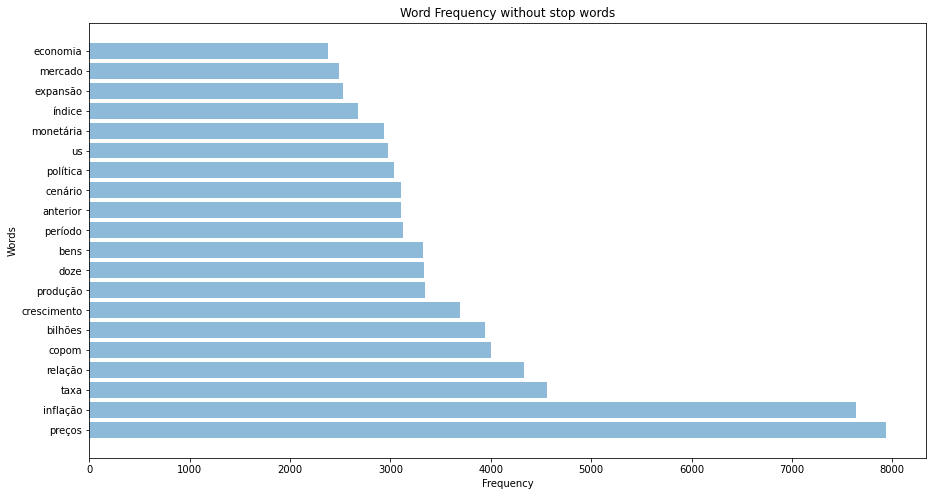

In [24]:
plt.barh(yPos, performance, align='center', alpha=0.5)
plt.yticks(yPos, objects)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Word Frequency without stop words')
plt.show()

### Wordcloud without stop words

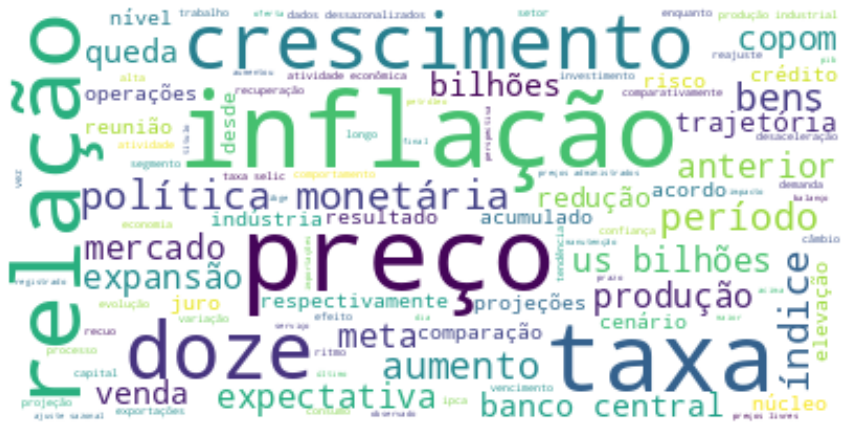

In [25]:
cloud = wordcloud.WordCloud(stopwords=Mystopwords, max_font_size=50, max_words=100, background_color="white").generate(''.join(corpus))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Bigram Frequency
 

### With stop words

In [26]:
numberOfBigrams = 20

In [27]:
bigramCountVect = CountVectorizer(analyzer='word', ngram_range=(2, 2))
bigramCountVect.fit(corpus);

In [28]:
bagOfBigrams = bigramCountVect.transform(corpus)
sumBigrams = bagOfBigrams.sum(axis=0)
bigramsFreq = [(bigram, sumBigrams[0, idx]) for bigram, idx in bigramCountVect.vocabulary_.items()]
bigramsFreq =sorted(bigramsFreq, key = lambda x: x[1], reverse=True)

In [29]:
yPos = np.arange(numberOfBigrams)
objects = []
performance = []
for i in range(numberOfBigrams):
    aux = bigramsFreq[i]
    objects.append(aux[0])
    performance.append(aux[1])

In [30]:
pd.Series(performance, index = objects, name = "Frequency").to_frame()

,Frequency
em relação,4107
doze meses,3299
de preços,2620
política monetária,2619
de inflação,2560
do ano,2426
de bens,2396
taxa de,2390
dos preços,2332
em doze,2296


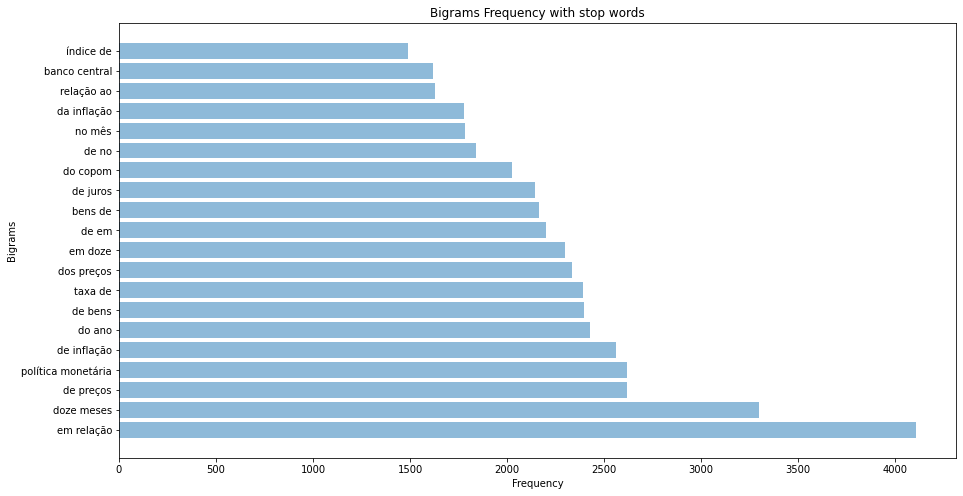

In [31]:
plt.barh(yPos, performance, align='center', alpha=0.5)
plt.yticks(yPos, objects)
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Bigrams Frequency with stop words')
plt.show()


### bigram cloud with stop words

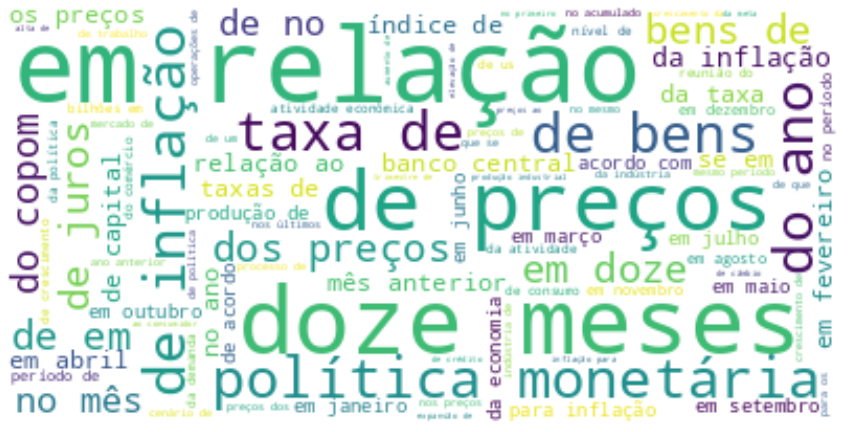

In [32]:
cloud = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(dict(bigramsFreq))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### Without stopwords

In [33]:
bigramCountVect2 = CountVectorizer(analyzer='word', ngram_range=(2, 2),stop_words = Mystopwords)
bigramCountVect2.fit(corpus);

In [34]:
bagOfBigrams2 = bigramCountVect2.transform(corpus)
sumBigrams2 = bagOfBigrams2.sum(axis=0)
bigramsFreq2 = [(bigram, sumBigrams2[0, idx]) for bigram, idx in bigramCountVect2.vocabulary_.items()]
bigramsFreq2 =sorted(bigramsFreq2, key = lambda x: x[1], reverse=True)

In [35]:
yPos = np.arange(numberOfBigrams)
objects = []
performance = []
for i in range(numberOfBigrams):
    aux = bigramsFreq2[i]
    objects.append(aux[0])
    performance.append(aux[1])

In [36]:
pd.Series(performance, index = objects, name = "Frequency").to_frame()

,Frequency
política monetária,2619
banco central,1619
bens capital,1229
reunião copom,1093
atividade econômica,1089
bens consumo,891
produção industrial,805
dados dessazonalizados,752
taxa selic,748
preços administrados,745


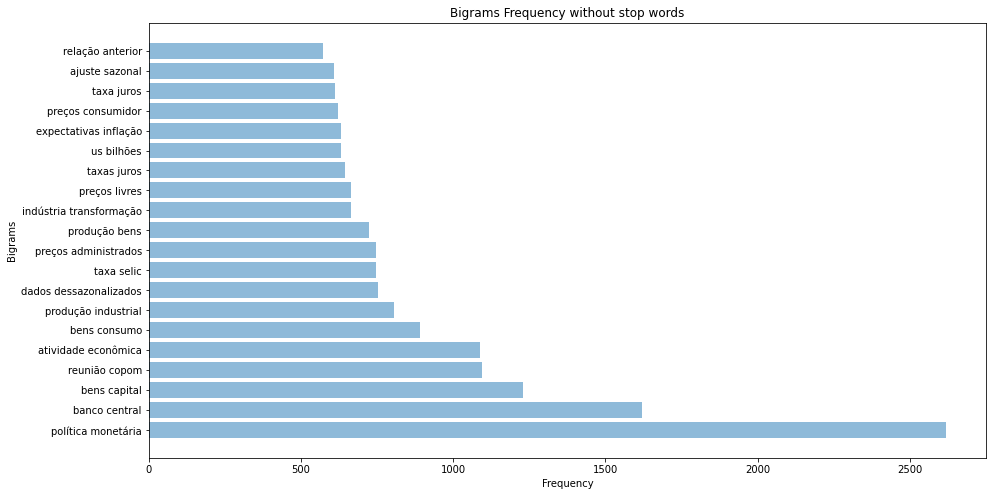

In [37]:
plt.barh(yPos, performance, align='center', alpha=0.5)
plt.yticks(yPos, objects)
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Bigrams Frequency without stop words')
plt.show()

### bigrams cloud without stop words

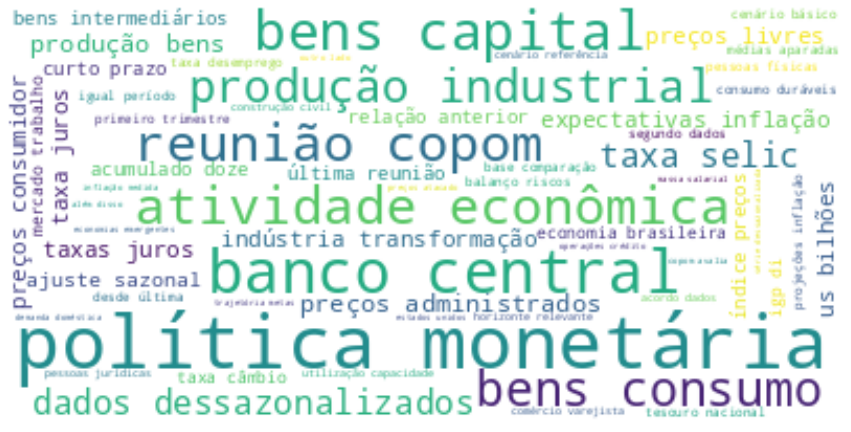

In [38]:
cloud = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(dict(bigramsFreq2))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## Trigram Frequency

### With stop words

In [39]:
numberOfTrigrams = 20

In [40]:
trigramCountVect = CountVectorizer(analyzer='word', ngram_range=(3, 3))
trigramCountVect.fit(corpus);

In [41]:
bagOfTrigrams = trigramCountVect.transform(corpus)
sumTrigrams = bagOfTrigrams.sum(axis=0)
trigramsFreq = [(trigram, sumTrigrams[0, idx]) for trigram, idx in trigramCountVect.vocabulary_.items()]
trigramsFreq =sorted(trigramsFreq, key = lambda x: x[1], reverse=True)

In [42]:
yPos = np.arange(numberOfTrigrams)
objects = []
performance = []
for i in range(numberOfTrigrams):
    aux = trigramsFreq[i]
    objects.append(aux[0])
    performance.append(aux[1])

In [43]:
pd.Series(performance, index = objects, name = "Frequency").to_frame()

,Frequency
em doze meses,2291
de bens de,1674
em relação ao,1596
bens de capital,1226
de acordo com,1226
da política monetária,1009
reunião do copom,946
bens de consumo,888
do ano anterior,854
da taxa de,819


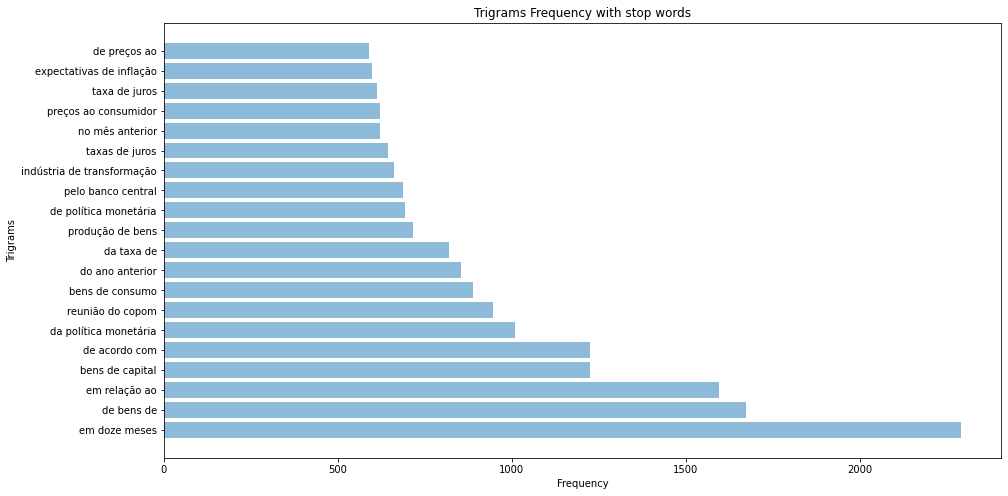

In [44]:
plt.barh(yPos, performance, align='center', alpha=0.5)
plt.yticks(yPos, objects)
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.title('Trigrams Frequency with stop words')
plt.show()

### Trigrams cloud with stop words

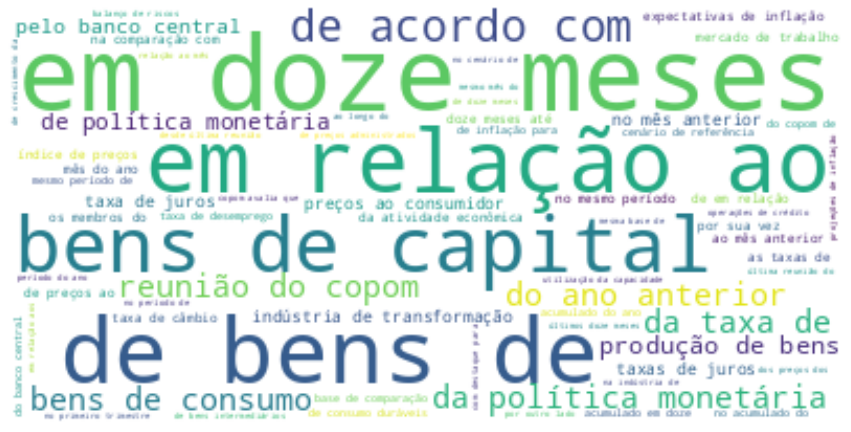

In [45]:
cloud = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(dict(trigramsFreq))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Without stop words

In [46]:
trigramCountVect2 = CountVectorizer(analyzer='word', ngram_range=(3, 3),stop_words = Mystopwords)
trigramCountVect2.fit(corpus);

In [47]:
bagOfTrigrams2 = trigramCountVect2.transform(corpus)
sumTrigrams2 = bagOfTrigrams2.sum(axis=0)
trigramsFreq2 = [(trigram, sumTrigrams2[0, idx]) for trigram, idx in trigramCountVect2.vocabulary_.items()]
trigramsFreq2 =sorted(trigramsFreq2, key = lambda x: x[1], reverse=True)

In [48]:
yPos = np.arange(numberOfTrigrams)
objects = []
performance = []
for i in range(numberOfTrigrams):
    aux = trigramsFreq2[i]
    objects.append(aux[0])
    performance.append(aux[1])

In [49]:
pd.Series(performance, index = objects, name = "Frequency").to_frame()

,Frequency
bens consumo duráveis,470
desde última reunião,450
produção bens capital,374
médias aparadas suavização,330
última reunião copom,325
mesma base comparação,325
massa salarial real,291
dessazonalizados banco central,274
administrados contrato monitorados,271
utilização capacidade instalada,260


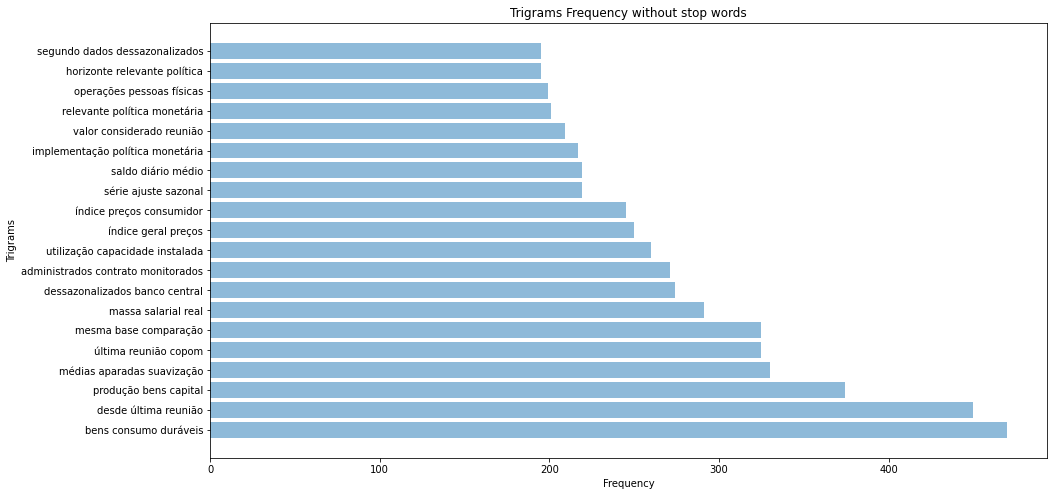

In [50]:
plt.barh(yPos, performance, align='center', alpha=0.5)
plt.yticks(yPos, objects)
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.title('Trigrams Frequency without stop words')
plt.show()

### Trigrams Cloud without stop words

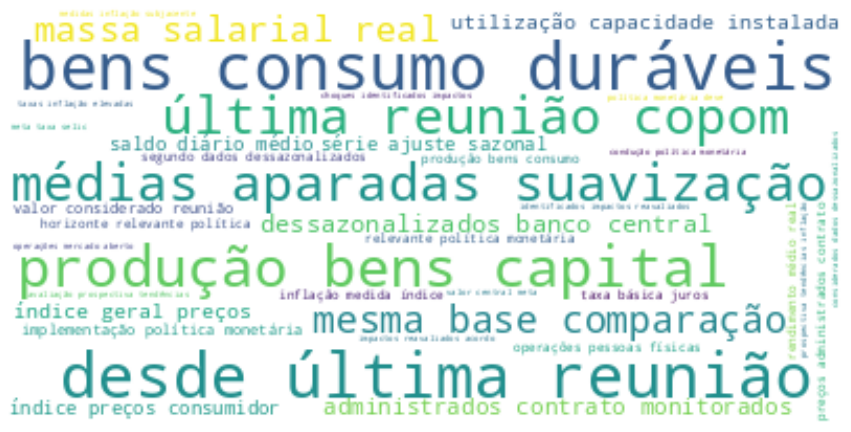

In [51]:
cloud = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(dict(trigramsFreq2))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Parsing

In [52]:
nlp = spacy.load('pt_core_news_sm')

In [53]:
%%time
text = []
pos = []
tag = []
dep = []
ent_text = []
ent_label = []
for ata in corpus:
    doc = nlp(ata)
    for token in doc:
        text.append(token.text)
        pos.append(token.pos_)
        tag.append(str(token.morph))
        dep.append(token.dep_)
    for ent in doc.ents:
        ent_text.append(ent.text)
        ent_label.append(ent.label_)

CPU times: user 2min 1s, sys: 345 ms, total: 2min 2s
Wall time: 2min 2s


In [54]:
df = pd.DataFrame(list(zip(text, pos)), 
               columns =['word', 'pos'])

## nouns

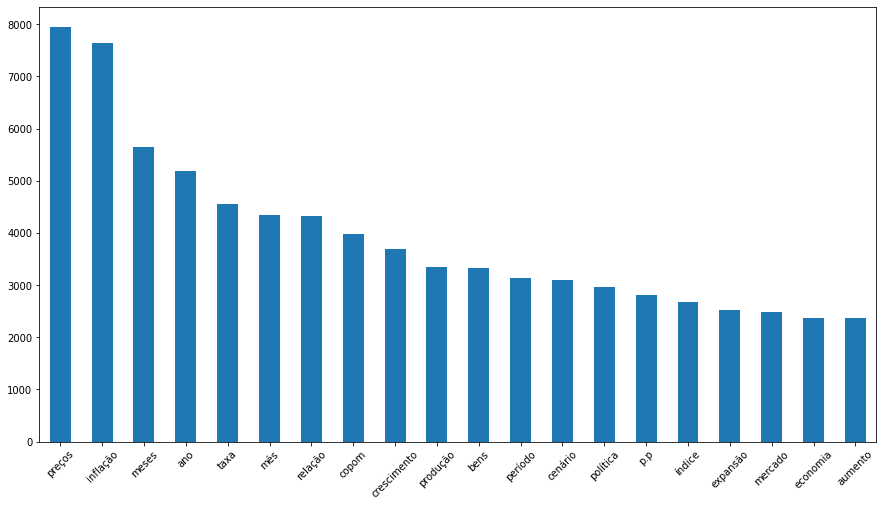

In [55]:
df[ (df['pos'] == 'PROPN') | (df['pos'] == 'NOUN')].loc[:,'word'].value_counts()[:20].plot.bar(rot=45);

## adjective 

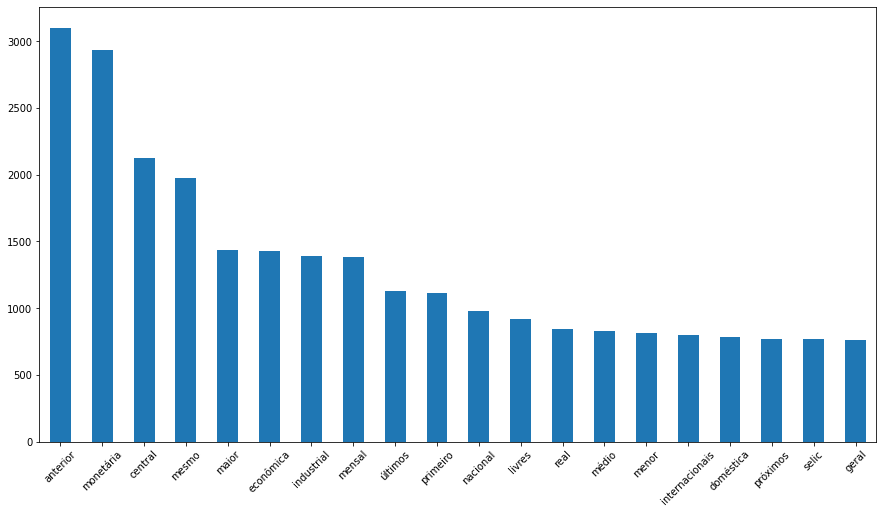

In [56]:
df[df['pos'] == 'ADJ'].loc[:,'word'].value_counts()[:20].plot.bar(rot=45);

## verb

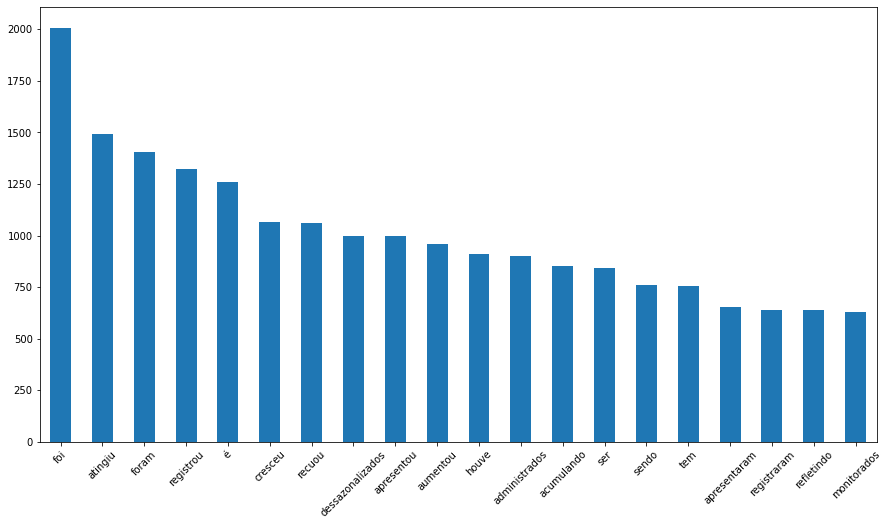

In [57]:
df[ (df['pos'] == 'AUX') | (df['pos'] == 'VERB')].loc[:,'word'].value_counts()[:20].plot.bar(rot=45);

## adverb

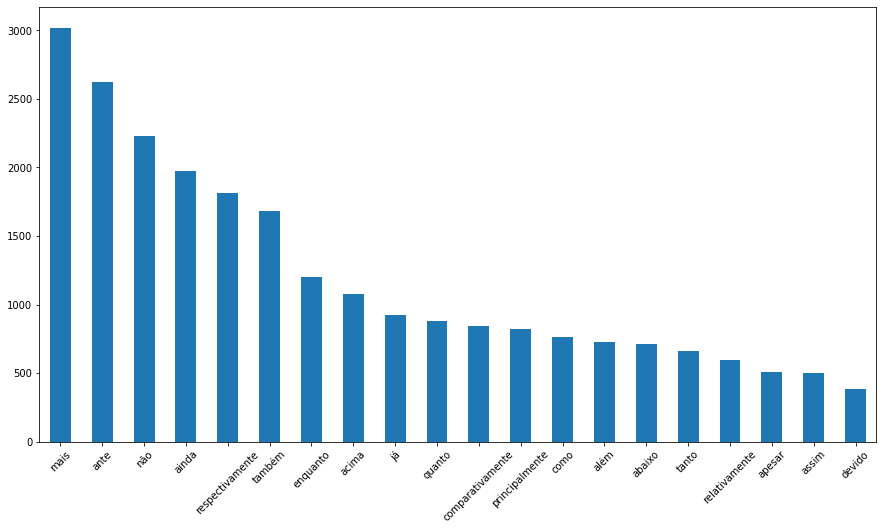

In [58]:
df[df['pos'] == 'ADV'].loc[:,'word'].value_counts()[:20].plot.bar(rot=45);

## conjunction

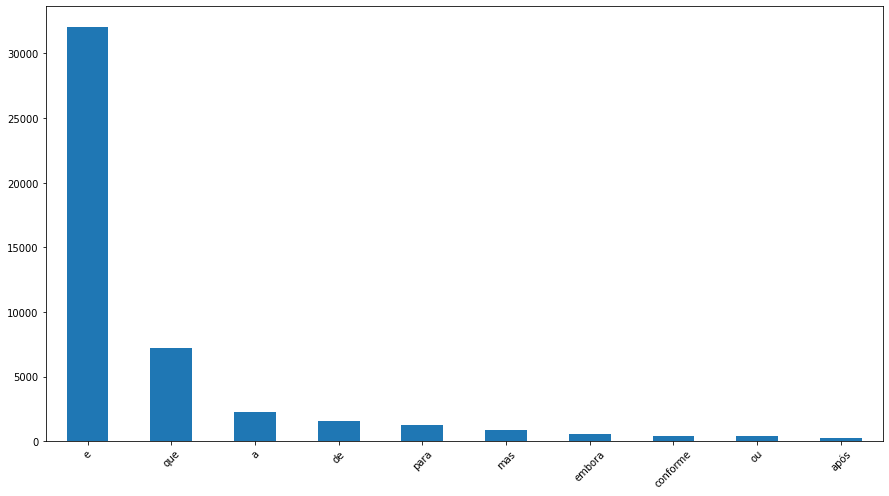

In [59]:
df[ (df['pos'] == 'CONJ') | (df['pos'] == 'CCONJ') | (df['pos'] == 'SCONJ')].loc[:,'word'].value_counts()[:10].plot.bar(rot=45);

## punctuation

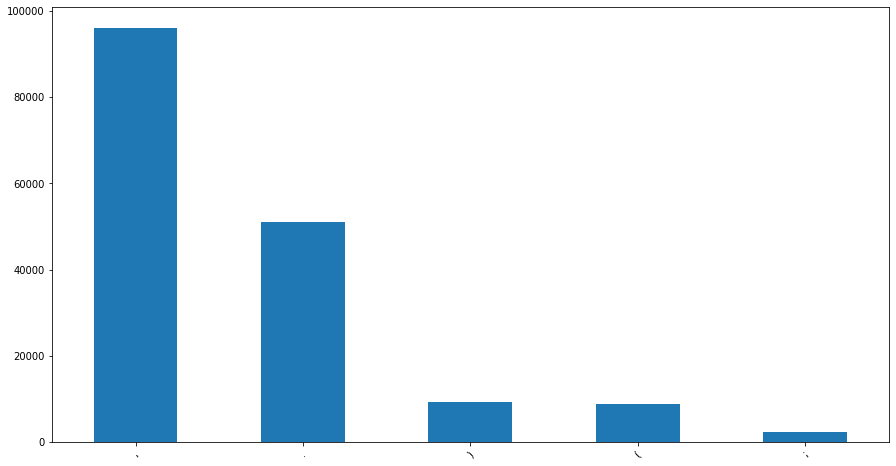

In [60]:
df[df['pos'] == 'PUNCT'].loc[:,'word'].value_counts()[:5].plot.bar(rot=45);

## determiner

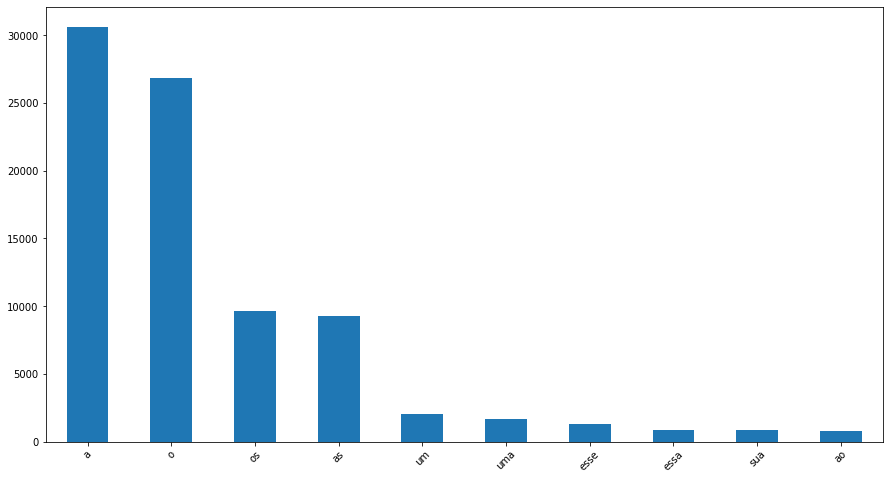

In [61]:
df[df['pos'] == 'DET'].loc[:,'word'].value_counts()[:10].plot.bar(rot=45);

## pronoun

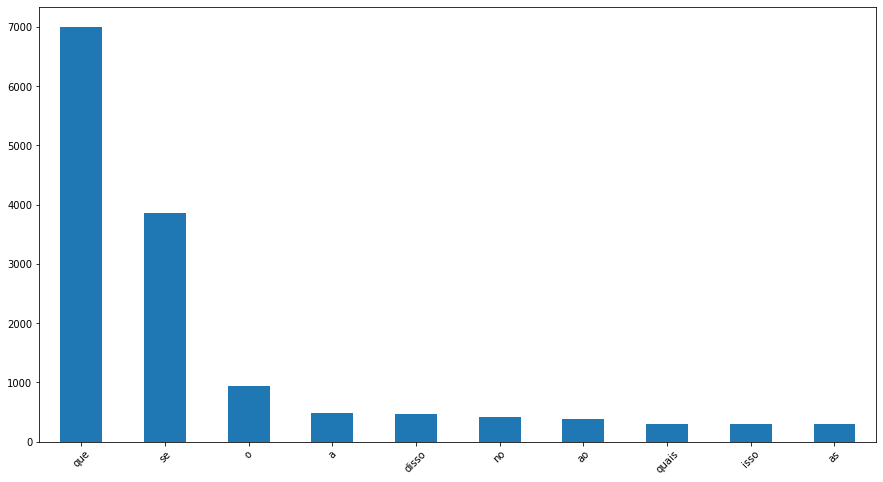

In [62]:
df[df['pos'] == 'PRON'].loc[:,'word'].value_counts()[:10].plot.bar(rot=45);

## numbers

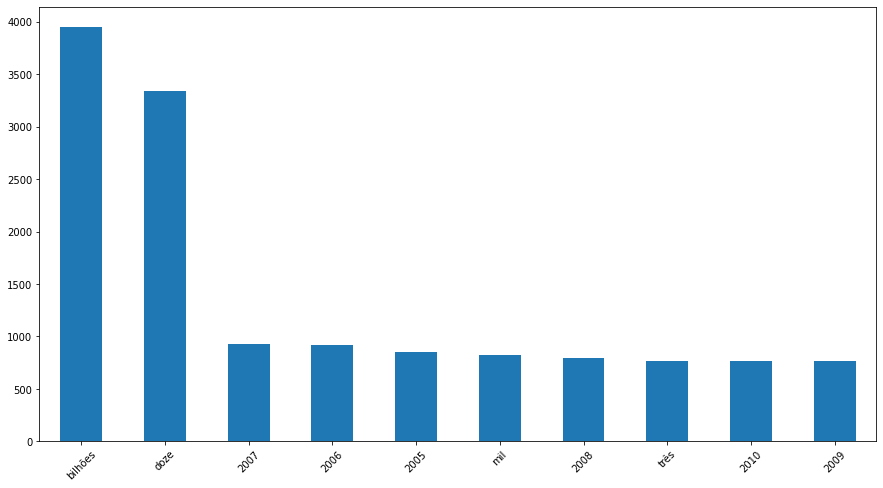

In [63]:
df[df['pos'] == 'NUM'].loc[:,'word'].value_counts()[:10].plot.bar(rot=45);

## symbol

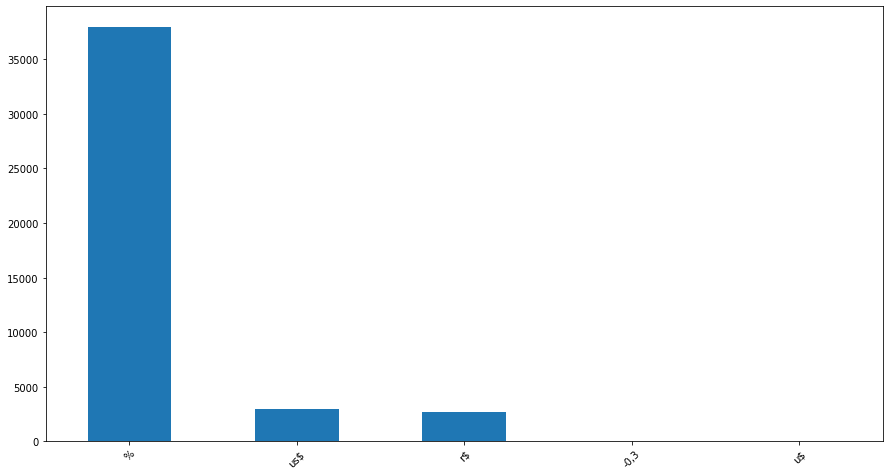

In [64]:
df[df['pos'] == 'SYM'].loc[:,'word'].value_counts()[:5].plot.bar(rot=45);

## part-Of-Speech 

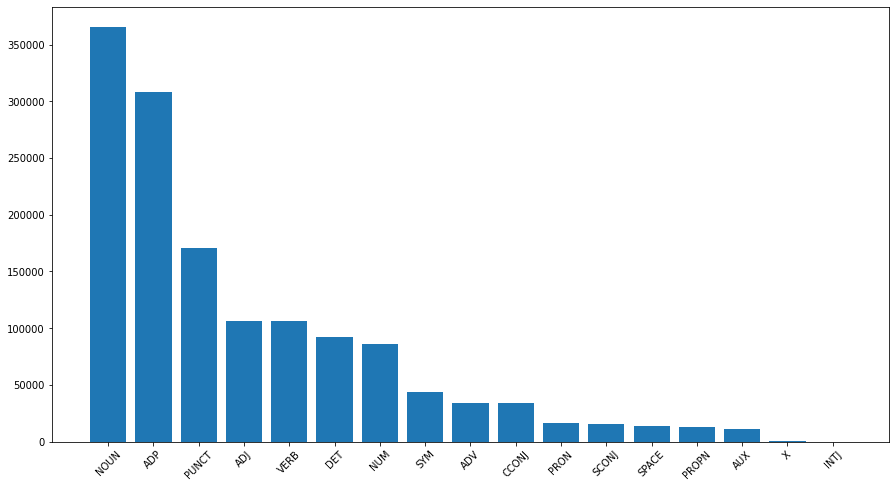

In [65]:
pos_ = Counter(pos)
pos_ = {key: val for key, val in sorted(pos_.items(), key = lambda x: x[1], reverse = True)}
plt.bar(range(len(pos_)), list(pos_.values()), align='center')
plt.xticks(range(len(pos_)), list(pos_.keys()),rotation = 45)
plt.show()

## morphology tags

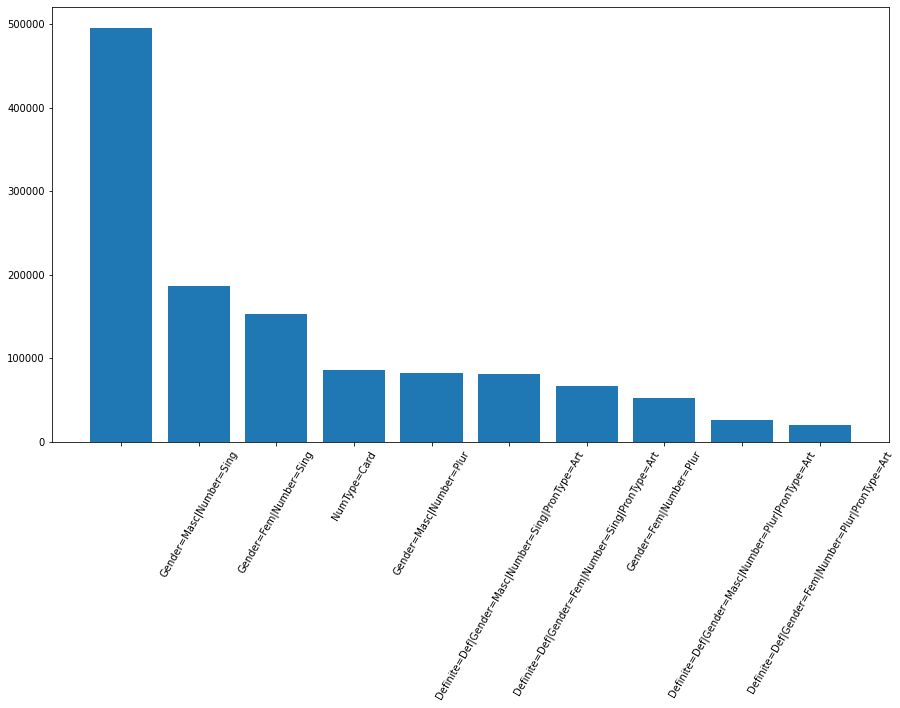

In [66]:
tag_ = {key: val for key, val in Counter(tag).most_common(10)}
plt.bar(range(len(tag_)), list(tag_.values()), align='center')
plt.xticks(range(len(tag_)), list(tag_.keys()),rotation = 60)
plt.show()

## dependencies

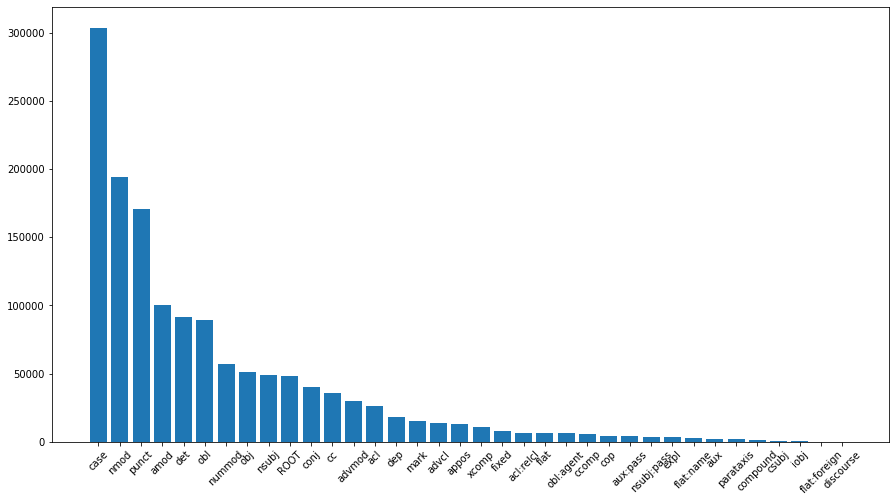

In [67]:
dep_ = Counter(dep)
dep_ = {key: val for key, val in sorted(dep_.items(), key = lambda x: x[1], reverse = True)}
plt.bar(range(len(dep_)), list(dep_.values()), align='center')
plt.xticks(range(len(dep_)), list(dep_.keys()),rotation = 45)
plt.show()

## entities

### texts

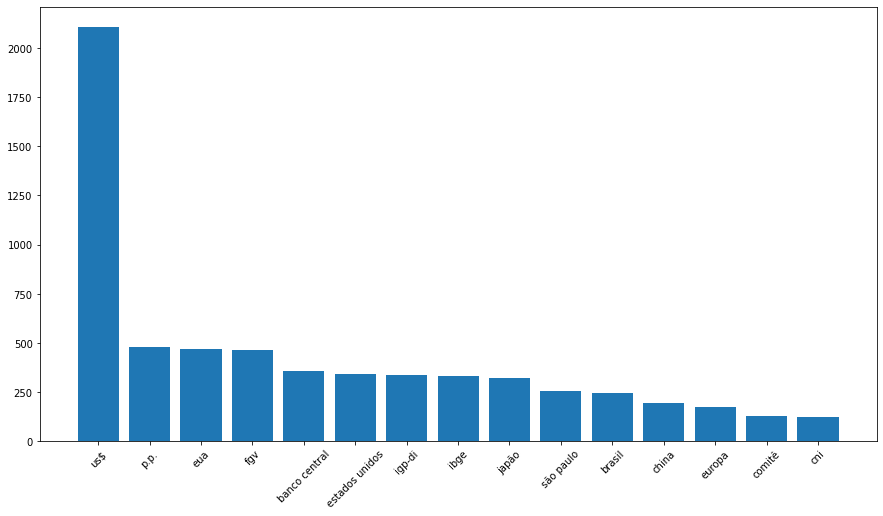

In [68]:
ent_ = {x : y for x, y in  Counter(ent_text).most_common(15)} 
plt.bar(range(len(ent_)), list(ent_.values()), align='center')
plt.xticks(range(len(ent_)), list(ent_.keys()),rotation = 45)
plt.show()

### labels

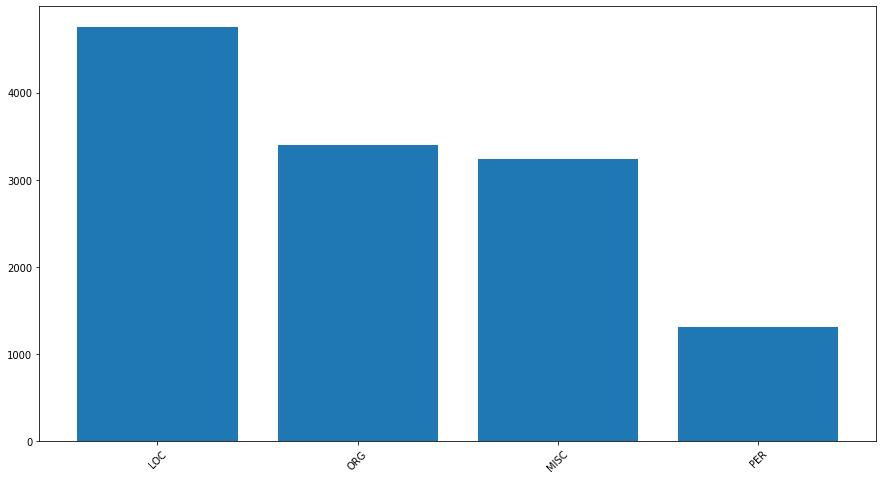

In [69]:
ent_ = {x : y for x, y in  Counter(ent_label).most_common(5)} 
plt.bar(range(len(ent_)), list(ent_.values()), align='center')
plt.xticks(range(len(ent_)), list(ent_.keys()),rotation = 45)
plt.show()